In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

/Users/albarron/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
url = "../Data/Tobacco.csv"
TobaccoData = pd.read_csv(url)

In [3]:
TobaccoData.head()

,Unnamed: 0,occupation,region,nkids,nkids2,nadults,lnx,stobacco,salcohol,age
0,1,bluecol,flanders,1,0,2,14.19054,0,0.000000,2
1,2,inactself,flanders,0,0,3,13.90857,0,0.002285,3
2,3,whitecol,flanders,0,0,1,13.97461,0,0.012875,2
3,4,bluecol,flanders,1,0,2,13.76281,0,0.005907,2
4,5,inactself,flanders,2,0,1,13.80800,0,0.021981,2


In [4]:
del TobaccoData['Unnamed: 0']
TobaccoData.head()

,occupation,region,nkids,nkids2,nadults,lnx,stobacco,salcohol,age
0,bluecol,flanders,1,0,2,14.19054,0,0.000000,2
1,inactself,flanders,0,0,3,13.90857,0,0.002285,3
2,whitecol,flanders,0,0,1,13.97461,0,0.012875,2
3,bluecol,flanders,1,0,2,13.76281,0,0.005907,2
4,inactself,flanders,2,0,1,13.80800,0,0.021981,2


Here is the data dictionary of this dataset:
https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Tobacco.html

In [5]:
region_dummy  = pd.get_dummies(TobaccoData['region'], prefix = 'region')
del region_dummy['region_flanders']

occupation_dummy = pd.get_dummies(TobaccoData['occupation'], prefix = 'occupation')
del occupation_dummy['occupation_inactself']

age_dummy = pd.get_dummies(TobaccoData['age'], prefix = 'age')
del age_dummy['age_0']

TobaccoData = pd.concat([TobaccoData,region_dummy ,occupation_dummy, age_dummy], axis=1)
TobaccoData.head()

,occupation,region,nkids,nkids2,nadults,lnx,stobacco,salcohol,age,region_brussels,region_walloon,occupation_bluecol,occupation_whitecol,age_1,age_2,age_3,age_4
0,bluecol,flanders,1,0,2,14.19054,0,0.000000,2,0,0,1,0,0,1,0,0
1,inactself,flanders,0,0,3,13.90857,0,0.002285,3,0,0,0,0,0,0,1,0
2,whitecol,flanders,0,0,1,13.97461,0,0.012875,2,0,0,0,1,0,1,0,0
3,bluecol,flanders,1,0,2,13.76281,0,0.005907,2,0,0,1,0,0,1,0,0
4,inactself,flanders,2,0,1,13.80800,0,0.021981,2,0,0,0,0,0,1,0,0


#### We would like to use a Decision Tree Regression model to detect the most important variables affect expenditure on tobacco. Please follow necessary steps to develop your Regression Tree, Tune it via Cross-Validation and lastly state the most important variable you found with the corresponding MSE of your best model. Your output is stobacco

In [6]:
# Prepping data
del TobaccoData['occupation']
del TobaccoData['region']
del TobaccoData['age']


In [7]:
X = TobaccoData[TobaccoData.columns.values]
del X['stobacco']

In [8]:
y = TobaccoData['stobacco']

In [9]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

In [10]:
# Develop Regression Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import numpy as np

treereg = DecisionTreeRegressor()
treereg.fit(X_train,y_train)
preds = treereg.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, preds)) # Give MSE the same units

0.033010989637533898

In [11]:
pd.DataFrame({'features':X.columns.values,'import':treereg.feature_importances_}).sort_values(by = ['import'],ascending = 0)

,features,import
3,lnx,0.439497
4,salcohol,0.279243
0,nkids,0.057151
12,age_4,0.040659
2,nadults,0.037512
8,occupation_whitecol,0.028044
7,occupation_bluecol,0.026311
6,region_walloon,0.024674
10,age_2,0.023947
9,age_1,0.018473


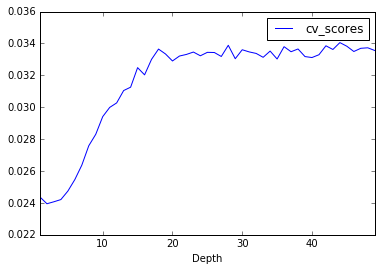

In [12]:
# Tune Regression Tree
from sklearn.cross_validation import cross_val_score

Depth = range(1,50)
score = []
for i in Depth: # How many decision points are in the tree
      treereg = DecisionTreeRegressor(max_depth=i)
      scores = cross_val_score(treereg, X, y, cv=10, scoring='mean_squared_error')
      score.append(np.mean(np.sqrt(-scores)))

Depth_Choice_df = pd.DataFrame({'cv_scores': score ,'Depth': Depth})
Depth_Choice_df.plot(x ='Depth',y = 'cv_scores' )



In [13]:
# Identify most important variables
# Develop Regression Tree
treereg = DecisionTreeRegressor(max_depth=2)
treereg.fit(X_train,y_train)
preds = treereg.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, preds)) # Give MSE the same units


0.023833009762904592

In [14]:
pd.DataFrame({'features':X.columns.values,'import':treereg.feature_importances_}).sort_values(by = ['import'],ascending = 0)

,features,import
3,lnx,0.537966
12,age_4,0.462034
0,nkids,0.000000
1,nkids2,0.000000
2,nadults,0.000000
4,salcohol,0.000000
5,region_brussels,0.000000
6,region_walloon,0.000000
7,occupation_bluecol,0.000000
8,occupation_whitecol,0.000000


Explain your findings:

In [ ]:
Smokers are people 

#### Now, let's treat stobacco as a dummy variable to distinguish between those who smoke and who do not. We then need to use decision tree classifier to identify the most important features that may affect probability of smoking.

In [15]:
TobaccoData['smoke'] = '1'
mask_cat0 = (TobaccoData['stobacco'] == 0)   

TobaccoData.loc[mask_cat0,'smoke'] = '0'
del TobaccoData['stobacco']
TobaccoData.head()

,nkids,nkids2,nadults,lnx,salcohol,region_brussels,region_walloon,occupation_bluecol,occupation_whitecol,age_1,age_2,age_3,age_4,smoke
0,1,0,2,14.19054,0.000000,0,0,1,0,0,1,0,0,0
1,0,0,3,13.90857,0.002285,0,0,0,0,0,0,1,0,0
2,0,0,1,13.97461,0.012875,0,0,0,1,0,1,0,0,0
3,1,0,2,13.76281,0.005907,0,0,1,0,0,1,0,0,0
4,2,0,1,13.80800,0.021981,0,0,0,0,0,1,0,0,0
